In [3]:
import pandas as pd
import numpy as np
import requests

In [34]:
dnew=pd.read_csv('../raw_data/london_re_postcodes_latlon_cleaned.zip',compression='zip',
                dtype={'price': np.int64,'month':np.int8,'year':np.int16} 
                )

In [22]:
dnew.head()

,price,date,postcode,property_type,property_age,ownership,year,month,lat,lon
0,420000,14-09-08 00:00,BR4 0BP,T,N,F,2014.0,9.0,51.383354,-0.000374
1,500000,14-10-27 00:00,SE16 7RL,T,N,F,2014.0,10.0,51.493026,-0.041706
2,520500,04-12-10 00:00,W5 5HX,T,N,F,2004.0,12.0,51.507016,-0.306697
3,762500,14-06-12 00:00,N19 3HZ,T,N,F,2014.0,6.0,51.564937,-0.128594
4,1150000,11-08-18 00:00,N1 0JA,T,N,F,2011.0,8.0,51.535515,-0.108532


In [63]:
batch1=pd.read_csv('../raw_data/london_re_postcodes_latlon_batch_1.zip',compression='zip',
               dtype={'price': np.int64,'month':np.int8,'year':np.int16} )


In [17]:
batch1.head(20)

,price,date,postcode,property_type,property_age,ownership,number,additional_info,street,locality,town,borough,county,year,month,day,full_property_number,lat_lon,lat,lon
0,790000,20-09-30 00:00,SW20 9HF,S,N,F,26,NaN,PARKWAY,NaN,LONDON,MERTON,GREATER LONDON,2020,9,30,26,"(51.40028, -0.224964)",51.400280,-0.224964
1,585000,20-11-13 00:00,BR3 4NX,T,N,F,11,NaN,ARROL ROAD,NaN,BECKENHAM,BROMLEY,GREATER LONDON,2020,11,13,11,"(51.403871, -0.052993)",51.403871,-0.052993
2,395000,20-10-23 00:00,DA16 1NE,S,N,F,177,NaN,NORTHDOWN ROAD,NaN,WELLING,BEXLEY,GREATER LONDON,2020,10,23,177,"(51.464676, 0.121365)",51.464676,0.121365
3,355000,20-10-23 00:00,DA16 1QU,T,N,F,5,NaN,BERWICK ROAD,NaN,WELLING,BEXLEY,GREATER LONDON,2020,10,23,5,"(51.469721, 0.111923)",51.469721,0.111923
4,1187500,20-11-02 00:00,SE19 2RE,D,N,F,2,NaN,LIMEKILN PLACE,NaN,LONDON,CROYDON,GREATER LONDON,2020,11,2,2,"(51.413832, -0.078427)",51.413832,-0.078427
5,720000,20-10-30 00:00,DA15 9EA,S,N,F,13,NaN,CAVENDISH AVENUE,NaN,SIDCUP,BEXLEY,GREATER LONDON,2020,10,30,13,"(51.444012, 0.104808)",51.444012,0.104808
6,411750,20-08-14 00:00,BR3 4NG,T,N,L,149,NaN,BLANDFORD ROAD,NaN,BECKENHAM,BROMLEY,GREATER LONDON,2020,8,14,149,"(51.407227, -0.047157)",51.407227,-0.047157
7,513000,20-10-21 00:00,KT5 9LQ,T,N,F,42,NaN,WARREN DRIVE NORTH,NaN,SURBITON,KINGSTON UPON THAMES,GREATER LONDON,2020,10,21,42,"(51.382514, -0.279436)",51.382514,-0.279436
8,395000,20-11-02 00:00,SM5 2AU,F,N,L,"WESTCROFT COURT, 59",FLAT 5,WESTCROFT ROAD,NaN,CARSHALTON,SUTTON,GREATER LONDON,2020,11,2,"WESTCROFT COURT, 59 FLAT 5","(51.366336, -0.158756)",51.366336,-0.158756
9,569950,20-10-15 00:00,BR4 0DH,T,N,F,43,NaN,LANGLEY WAY,NaN,WEST WICKHAM,BROMLEY,GREATER LONDON,2020,10,15,43,"(51.380014, -0.006483)",51.380014,-0.006483


In [64]:
batch1.drop(labels=['number', 'additional_info','street', 'locality', 'borough','town','county','day','full_property_number'], 
            axis='columns',
           inplace=True)

In [37]:
merged=pd.concat([batch1, dnew], axis=0, ignore_index=True)

In [38]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343094 entries, 0 to 343093
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          343094 non-null  int64  
 1   date           343094 non-null  object 
 2   postcode       343094 non-null  object 
 3   property_type  343094 non-null  object 
 4   property_age   343094 non-null  object 
 5   ownership      343094 non-null  object 
 6   year           343094 non-null  int16  
 7   month          343094 non-null  int8   
 8   lat            343094 non-null  float64
 9   lon            343094 non-null  float64
dtypes: float64(2), int16(1), int64(1), int8(1), object(5)
memory usage: 21.9+ MB


In [49]:
merged.sort_values(['year','month'],inplace=True)

In [53]:
merged_clean=merged.drop_duplicates()
# difference shows about 

In [54]:
len(merged)-len(merged_clean)

11480

In [57]:
# save to csv
merged_clean.to_csv('../raw_data/london_re_postcodes_latlon_merged_cleaned_v1.zip',
                    compression='zip',
                   index=False)

## Create dictionary of postcode - latlon value based on api extracted data

In [58]:
len(merged_clean)

331614

In [60]:
merged_clean.postcode.nunique()

98621

In [65]:
# compare the above number to overall number of unique postcodes -> it's about 131k? 
# extract per postcode the lat and lon value (do it from unmerged?)
batch1.postcode.nunique()
# or create new str column from lat lon, only keep nunique and latlon line

90517

In [70]:
merged_clean['latlon']=merged_clean.apply(lambda x: list([x['lat'],x['lon']]),
                                          axis=1)

/var/folders/63/8j1yfj216fzgvry8md3j8x400000gn/T/ipykernel_4240/3169057694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_clean['latlon']=merged_clean.apply(lambda x: list([x['lat'],x['lon']]),


In [96]:
tmp=merged_clean[['postcode','latlon']]
print(tmp['postcode'].nunique())

98621


In [106]:
# selecting only the unique postcodes
tmp.drop_duplicates(subset=['postcode'],inplace=True)
tmp.set_index(['postcode'],inplace=True)

/var/folders/63/8j1yfj216fzgvry8md3j8x400000gn/T/ipykernel_4240/1833647678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.drop_duplicates(subset=['postcode'],inplace=True)


In [107]:
tmp

,latlon
postcode,
SW7 5QT,"[51.494562, -0.179464]"
SW7 1NL,"[51.499898, -0.17042]"
SE21 8AT,"[51.434224, -0.08642]"
N2 0DT,"[51.586956, -0.181013]"
IG8 0NF,"[51.613171, 0.026884]"
...,...
SE15 3SY,"[51.468168, -0.064324]"
TW1 2NG,"[51.450334, -0.317732]"
E2 8PJ,"[51.533449, -0.071072]"


In [134]:
# create dictionary out of df index (postcode) -> column(lat,lon)
latlondict=tmp.to_dict(orient='index')
latlondict

{'SW7 5QT': {'latlon': [51.494562, -0.179464]},
 'SW7 1NL': {'latlon': [51.499898, -0.17042]},
 'SE21 8AT': {'latlon': [51.434224, -0.08642]},
 'N2 0DT': {'latlon': [51.586956, -0.181013]},
 'IG8 0NF': {'latlon': [51.613171, 0.026884]},
 'UB3 2NQ': {'latlon': [51.51606, -0.420653]},
 'TW10 6PL': {'latlon': [51.457482, -0.297721]},
 'EN4 0HU': {'latlon': [51.670459, -0.168342]},
 'NW11 6YD': {'latlon': [51.585762, -0.196838]},
 'NW3 7DJ': {'latlon': [51.554584, -0.186665]},
 'W13 8AJ': {'latlon': [51.521163, -0.321206]},
 'SW10 9UR': {'latlon': [51.481559, -0.188162]},
 'SW5 9NN': {'latlon': [51.492404, -0.196376]},
 'SW11 6AF': {'latlon': [51.454557, -0.155479]},
 'SW7 3LR': {'latlon': [51.492982, -0.173866]},
 'W11 2HR': {'latlon': [51.512788, -0.210905]},
 'SW19 6NY': {'latlon': [51.442869, -0.207235]},
 'SW6 7BN': {'latlon': [51.479835, -0.206506]},
 'WC1B 3AG': {'latlon': [51.517761, -0.129634]},
 'W2 2HL': {'latlon': [51.513974, -0.164264]},
 'N21 1AP': {'latlon': [51.638515, -0.1

In [112]:
#accessing the dictionary
key='SW7 5QT'
lat=latlondict[key]['latlon'][0]
lon=latlondict[key]['latlon'][1]

## populating lat lon values in df sample by calling postcode dict 

In [130]:
%cd ..

/Users/Marie/code/MarieMCodes/re_value_predictor


/Users/Marie/.pyenv/versions/3.10.6/envs/re_value_predictor/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [131]:
!pwd


/Users/Marie/code/MarieMCodes/re_value_predictor


In [141]:
from project_code.data import load_csv, tidy_df, shorten_df
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [193]:
data=load_csv()
df=tidy_df(data)
df=shorten_df(df)
df.head()

,price,date,postcode,property_type,property_age,ownership,year,month
3,405000,95-04-07 00:00,N1 2JU,S,N,F,1995,4
120,620000,95-09-01 00:00,SW15 2NU,T,N,F,1995,9
132,200500,95-11-20 00:00,SE23 2QA,D,N,F,1995,11
138,270000,95-09-01 00:00,SW5 0DU,F,N,L,1995,9
251,210000,95-05-19 00:00,SW19 7HD,T,N,F,1995,5


In [144]:
len(df)

2172318

In [145]:
sample=df.sample(1000,random_state=42)

In [155]:
# Build function to look up key or will with Error
def dict_lat_lookup(postcode):
    """ 
    takes a postcode and looks up lat value based on dictionary
    """
    try:
        lat=latlondict[postcode]['latlon'][0]
        return lat
    except:
        return None

def dict_lon_lookup(postcode):
    """ 
    takes a postcode and looks up lon value based on dictionary
    """
    try:
        lon=latlondict[postcode]['latlon'][1]
        return lon
    except:
        return None


In [156]:
sample['lat']=sample['postcode'].apply(lambda x: dict_lat_lookup(x))


In [161]:
# extract all the missing postcodes - no latlon yet
df_api=sample[sample['lat'].isna()==True]
df_api
# create new df for postcodes with no latlon and only keep unique postcodes.
# Run api on those, can use new dict later to prepoluate rest of df


,price,date,postcode,property_type,property_age,ownership,year,month,lat
2922072,2950000,16-12-22 00:00,SW7 1JH,F,N,L,2016,12,NaN
2219682,365000,10-01-08 00:00,IG4 5AE,T,N,F,2010,1,NaN
2080140,315000,08-02-08 00:00,SE19 1XQ,F,N,L,2008,2,NaN
1142629,320000,02-08-23 00:00,TW1 1RP,T,N,F,2002,8,NaN
1883984,245000,07-12-20 00:00,KT2 6QR,F,Y,L,2007,12,NaN
2554247,290000,13-11-01 00:00,RM14 2SQ,F,N,L,2013,11,NaN
192228,363000,96-09-05 00:00,SW3 5NP,F,N,L,1996,9,NaN
2472393,418000,13-06-05 00:00,NW1 2NN,F,N,L,2013,6,NaN
1648331,419998,05-04-07 00:00,EC2A 4XF,F,N,L,2005,4,NaN


In [162]:
df_api['postcode'].nunique()

9

## Fill whole cleaned df with lat lon values

In [194]:
df['lat']=df['postcode'].apply(lambda x: dict_lat_lookup(x))
df['lon']=df['postcode'].apply(lambda x: dict_lon_lookup(x))

In [195]:
# extract dataset without postcodes = 173thousand rows
df_for_api=df[df['lat'].isna()==True]
len(df_for_api)

173881

In [196]:
# write this dataset to csv
df_for_api.to_csv('raw_data/london_re_needs_latlon.zip' ,index=False, compression='zip')

In [197]:
df_for_api

,price,date,postcode,property_type,property_age,ownership,year,month,lat,lon
811,300000,95-01-09 00:00,TW5 9TY,D,N,F,1995,1,NaN,NaN
986,312500,95-02-10 00:00,W11 4NH,T,N,F,1995,2,NaN,NaN
1213,275000,95-04-04 00:00,HA1 3ND,D,N,F,1995,4,NaN,NaN
1307,370000,95-01-06 00:00,W5 2RL,D,N,F,1995,1,NaN,NaN
1323,275000,95-09-01 00:00,N1 2QE,S,N,F,1995,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3581344,330000,22-01-18 00:00,E18 1AE,F,N,L,2022,1,NaN,NaN
3585740,622000,22-08-18 00:00,SE15 4LJ,T,N,F,2022,8,NaN,NaN
3589934,395000,22-05-17 00:00,N5 2EW,F,N,L,2022,5,NaN,NaN
3605982,320000,22-02-11 00:00,HA9 6DE,F,Y,L,2022,2,NaN,NaN


In [178]:
# save dataset without Nan postcodes - ready for training -- approx. 2ml rows
df=df[df['lat'].isna()==False]
# save to csv
df.to_csv('raw_data/london_re_postcodes_latlon_cleaned_v2.zip' ,index=False, compression='zip')

In [179]:
len(df)

1998437

In [177]:
# duplication identification doesn't work with strings. better once all are hot encoded. but there shouldnt be duplicates in the data anyway.
df[df.duplicated(subset=['price', 'postcode', 'property_type', 'property_age', 'ownership', 'year', 'month'], keep=False)]

,price,date,postcode,property_type,property_age,ownership,year,month,lat,lon
858,295000,95-12-01 00:00,SW1V 3QP,F,N,L,1995,12,51.486377,-0.133598
1690,249950,95-12-05 00:00,SW13 9EY,T,Y,F,1995,12,51.484916,-0.234925
2146,400000,95-03-03 00:00,W1J 8EA,F,Y,L,1995,3,51.508665,-0.143524
2424,830000,95-01-02 00:00,EC4A 1JQ,F,N,F,1995,1,51.517281,-0.110340
2860,200000,95-06-12 00:00,SW3 3HN,F,N,L,1995,6,51.491539,-0.165511
...,...,...,...,...,...,...,...,...,...,...
3621789,750000,23-01-23 00:00,SW8 2FY,F,N,L,2023,1,51.481772,-0.127251
3621790,750000,23-01-23 00:00,SW8 2FY,F,N,L,2023,1,51.481772,-0.127251
3622599,380000,23-01-16 00:00,RM12 5EH,T,N,F,2023,1,51.546144,0.191210
3622751,380000,23-01-27 00:00,RM12 5EH,T,N,F,2023,1,51.546144,0.191210


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998437 entries, 3 to 3623318
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int32  
 1   date           object 
 2   postcode       object 
 3   property_type  object 
 4   property_age   object 
 5   ownership      object 
 6   year           int16  
 7   month          int16  
 8   lat            float64
 9   lon            float64
dtypes: float64(2), int16(2), int32(1), object(5)
memory usage: 137.2+ MB


## Convert month to cyclical feature

In [181]:
import matplotlib.pyplot as plt

# transforming month column MM
months_in_year=12
df['sin_time'] = np.sin(2*np.pi*df.month/months_in_year)
df['cos_time'] = np.cos(2*np.pi*df.month/months_in_year)
#df.drop('month', axis=1, inplace=True)  keep the month axis

In [183]:
df.drop(columns=['postcode'],inplace=True)

In [184]:
df.to_csv('raw_data/london_re_postcodes_latlon_master.zip' ,index=False, compression='zip')

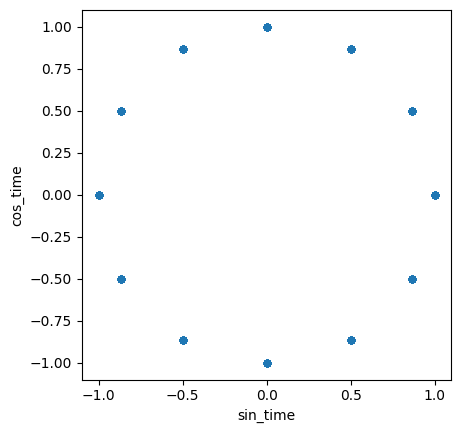

In [186]:
df.plot.scatter('sin_time','cos_time').set_aspect('equal')

In [185]:
df.columns

Index(['price', 'date', 'property_type', 'property_age', 'ownership', 'year',
       'month', 'lat', 'lon', 'sin_time', 'cos_time'],
      dtype='object')

## Extracting postcodes from latest batch and compare to dict


In [220]:
batch2=pd.read_csv('raw_data/london_re_postcodes_latlon_batch_2.zip', dtype={'price': np.int64,'month':np.int8,'year':np.int16} )

In [221]:
len(batch2)

299621

In [222]:
batch2.columns
# dropping irrelevant columns
batch2.drop(columns=['number', 'additional_info', 'street', 'locality', 'town',
       'borough', 'county','day','full_property_number'], inplace=True)

In [223]:
batch2.head()

,price,date,postcode,property_type,property_age,ownership,year,month,lat_lon,lat,lon
0,562500,17-07-19 00:00,SW18 4PX,F,N,L,2017,7,"(51.441658, -0.193972)",51.441658,-0.193972
1,114000,17-06-23 00:00,SE3 7RR,F,N,L,2017,6,"(51.482169, 0.005285)",51.482169,0.005285
2,620000,17-07-10 00:00,SE5 9LP,F,N,L,2017,7,"(51.474869, -0.102388)",51.474869,-0.102388
3,365000,17-07-21 00:00,SE13 6AD,F,N,L,2017,7,"(51.458091, -0.013476)",51.458091,-0.013476
4,218000,17-02-13 00:00,IG11 7PX,F,N,L,2017,2,"(51.537004, 0.080299)",51.537004,0.080299


In [224]:
# extract unique postcodes, then drop duplicate postcodes
#postcode_list=batch2['postcode'].nunique()
batch2['postcode'].nunique()

91713

In [225]:
batch_unique=batch2.drop_duplicates(subset=['postcode'])
#batch_unique.set_index(['postcode'],inplace=True)
len(batch_unique)

91713

In [ ]:
postcode_list=list(postcode_list)

In [212]:
postcode_list
print(len(postcode_list))
set_postcodes=list(set(postcode_list))
print(len(set_postcodes))
set_postcodes

91713
91713


['SE21 8LA',
 'N18 1RN',
 'UB7 7UE',
 'SE18 1AN',
 'HA7 3RZ',
 'SE15 3NY',
 'SE11 4XA',
 'HA4 9TU',
 'HA2 7SY',
 'SE5 9HE',
 'W13 0HF',
 'SE9 3GB',
 'DA5 3NT',
 'NW6 2AZ',
 'TW11 0NX',
 'UB8 2JU',
 'CR2 0AE',
 'KT1 2SU',
 'HA5 4PR',
 'SM5 4HP',
 'SW1X 7QS',
 'SE17 3SG',
 'W7 2AF',
 'SW17 6DB',
 'RM6 4BJ',
 'NW1 8AP',
 'BR3 4NR',
 'NW11 7BT',
 'RM8 3JP',
 'HA8 6HL',
 'SW8 2TW',
 'NW9 9DA',
 'N19 3TT',
 'SE23 1RY',
 'EN3 6GS',
 'NW7 1FJ',
 'E1 2AW',
 'N16 7JL',
 'NW10 3QB',
 'N17 0JH',
 'SE3 0RF',
 'E6 1EN',
 'CR0 4QW',
 'SW15 4BT',
 'SE6 4TB',
 'E17 8NT',
 'SE13 6ER',
 'HA4 8RY',
 'NW1 6EP',
 'E1W 3AB',
 'RM6 6LA',
 'N19 4AA',
 'N13 6AE',
 'RM11 3SB',
 'SW10 9JZ',
 'KT3 3AJ',
 'SW8 4RP',
 'DA5 2AS',
 'SW18 4QF',
 'SE2 9BD',
 'N14 4XJ',
 'KT1 3SE',
 'SW1A 1JT',
 'E11 4QF',
 'W12 7LP',
 'BR5 1NE',
 'SE28 8DH',
 'BR3 6TJ',
 'SW4 6RD',
 'KT3 6JX',
 'BR5 2PJ',
 'SW3 4TA',
 'SE15 4JJ',
 'EN2 7LR',
 'N10 1JY',
 'EN4 8QH',
 'N13 4NH',
 'UB4 8PL',
 'SW10 9BJ',
 'NW2 4JA',
 'DA15 7HY',
 'SW11 3GR

In [230]:
# write loop if item in list is in dict, if not, extract to new list
new_postcode_list=[]
for postcode in set_postcodes:
    if postcode in latlondict.keys():
        pass
    else:
        new_postcode_list.append(postcode)


In [231]:
len(new_postcode_list)

14943

In [243]:
# Now, need to retrieve lat lon for those postcodes in df 
tmp_batch=batch_unique[['postcode','lat','lon']]
tmp_batch.set_index('postcode', inplace=True)

In [244]:
tmp_batch

,lat,lon
postcode,,
SW18 4PX,51.441658,-0.193972
SE3 7RR,51.482169,0.005285
SE5 9LP,51.474869,-0.102388
SE13 6AD,51.458091,-0.013476
IG11 7PX,51.537004,0.080299
...,...,...
SE6 3AB,51.427759,-0.014061
SW2 4EN,51.447408,-0.127100
TN16 3LZ,51.312035,0.042670


In [245]:
# and write as new dict
latlondict2=tmp_batch.to_dict(orient='index')
latlondict2

{'SW18 4PX': {'lat': 51.441658, 'lon': -0.193972},
 'SE3 7RR': {'lat': 51.482169, 'lon': 0.005285},
 'SE5 9LP': {'lat': 51.474869, 'lon': -0.102388},
 'SE13 6AD': {'lat': 51.458091, 'lon': -0.013476},
 'IG11 7PX': {'lat': 51.537004, 'lon': 0.080299},
 'SE13 7TS': {'lat': 51.465905, 'lon': -0.022469},
 'SW18 5PD': {'lat': 51.440274, 'lon': -0.198103},
 'SW18 3TD': {'lat': 51.437702, 'lon': -0.183524},
 'TW1 2BT': {'lat': 51.455996, 'lon': -0.313782},
 'SW9 9PB': {'lat': 51.463961, 'lon': -0.123586},
 'SW15 1EX': {'lat': 51.467668, 'lon': -0.221827},
 'SW11 5TB': {'lat': 51.464463, 'lon': -0.160377},
 'SE24 0NP': {'lat': 51.455011, 'lon': -0.106105},
 'E15 2LB': {'lat': 51.537488, 'lon': -0.003474},
 'RM8 2AR': {'lat': 51.551346, 'lon': 0.111071},
 'TW9 2HN': {'lat': 51.46847, 'lon': -0.291495},
 'SW12 0DX': {'lat': 51.444537, 'lon': -0.139967},
 'SE5 8TQ': {'lat': 51.46621, 'lon': -0.08858},
 'SW4 6DR': {'lat': 51.465149, 'lon': -0.135461},
 'SE26 5PP': {'lat': 51.424213, 'lon': -0.0524

In [253]:
# test access 
key='SE5 9LP'
lat=latlondict2[key]['lat']
lon=latlondict2[key]['lon']
lat,lon

# pack in function
def get_lat(postcode):
    try:
        lat=latlondict2[postcode]['lat']
        return lat
    except:
        return None

def get_lon(postcode):
    try:
        lat=latlondict2[postcode]['lon']
        return lon
    except:
        return None

In [256]:
get_lat('N1 7RN')

In [ ]:
# then loop through remaining df and fill lat lon
# load df
nans=pd.read_csv('raw_data/london_re_needs_latlon.zip',dtype={'price': np.int64,'month':np.int8,'year':np.int16} )
nans

In [258]:
nans['lat']=nans['postcode'].apply(lambda x: get_lat(x))
nans['lon']=nans['postcode'].apply(lambda x: get_lon(x))
nans


,price,date,postcode,property_type,property_age,ownership,year,month,lat,lon
0,300000,95-01-09 00:00,TW5 9TY,D,N,F,1995,1,NaN,NaN
1,312500,95-02-10 00:00,W11 4NH,T,N,F,1995,2,51.509597,-0.102388
2,275000,95-04-04 00:00,HA1 3ND,D,N,F,1995,4,NaN,NaN
3,370000,95-01-06 00:00,W5 2RL,D,N,F,1995,1,NaN,NaN
4,275000,95-09-01 00:00,N1 2QE,S,N,F,1995,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
173876,330000,22-01-18 00:00,E18 1AE,F,N,L,2022,1,NaN,NaN
173877,622000,22-08-18 00:00,SE15 4LJ,T,N,F,2022,8,NaN,NaN
173878,395000,22-05-17 00:00,N5 2EW,F,N,L,2022,5,NaN,NaN
173879,320000,22-02-11 00:00,HA9 6DE,F,Y,L,2022,2,NaN,NaN


In [260]:
# extract remaining NaN values and save both files  
new_nan=nans[nans['lat'].isna()==True]  # 63thousant rows
clean_data=nans[nans['lat'].isna()==False]
# drop postcode column
clean_data=clean_data.drop(columns='postcode')

In [269]:
new_nan.to_csv('raw_data/london_re_needs_latlon.zip', index=False)

In [268]:
# add sin / cos
# and save dataframe
clean_data['sin_time'] = np.sin(2*np.pi*clean_data.month/12)
clean_data['cos_time'] = np.cos(2*np.pi*clean_data.month/12)
clean_data.to_csv('raw_data/london_re_postcodes_latlon_master_additional1.zip', index=False)

In [ ]:
# !! as a next step, from big df, extract the values where we don't have lat lon and run api on those, with unique postcodes only.

## Merge additional data with master

In [270]:
master=pd.read_csv('raw_data/london_re_postcodes_latlon_master.zip', 
               dtype={'price': np.int64,'month':np.int8,'year':np.int16}
              )
additional=pd.read_csv('raw_data/london_re_postcodes_latlon_master_additional1.zip', 
               dtype={'price': np.int64,'month':np.int8,'year':np.int16}
              )

In [271]:
print(master.columns)
additional.columns

Index(['price', 'date', 'property_type', 'property_age', 'ownership', 'year',
       'month', 'lat', 'lon', 'sin_time', 'cos_time'],
      dtype='object')


Index(['price', 'date', 'property_type', 'property_age', 'ownership', 'year',
       'month', 'lat', 'lon', 'sin_time', 'cos_time'],
      dtype='object')

In [273]:
print(len(master))
print(len(additional))
len(master) + len(additional)

1998437
110739


2109176

In [275]:
merged_df=pd.concat([master,additional],axis=0,ignore_index=True)
len(merged_df)

2109176

In [276]:
merged_df.to_csv('raw_data/london_re_postcodes_latlon_master.zip', index=False)

In [281]:
# inspecting how many unique postcodes are still missing -> ca. 16 thousand
new_nan['postcode'].nunique()

# could just run those through the code to get faster
46553  

16589

In [286]:
missing_unique=new_nan.drop_duplicates(subset=['postcode'])
missing_unique
# write this to csv and get only those lat lon, and can then populate the other df w the full 67 thousand or so.



,price,date,postcode,property_type,property_age,ownership,year,month,lat,lon
0,300000,95-01-09 00:00,TW5 9TY,D,N,F,1995,1,NaN,NaN
2,275000,95-04-04 00:00,HA1 3ND,D,N,F,1995,4,NaN,NaN
3,370000,95-01-06 00:00,W5 2RL,D,N,F,1995,1,NaN,NaN
4,275000,95-09-01 00:00,N1 2QE,S,N,F,1995,9,NaN,NaN
5,225000,95-06-20 00:00,IG8 7JQ,D,N,F,1995,6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
173872,222500,22-02-14 00:00,N13 7YH,F,N,L,2022,2,NaN,NaN
173873,1860000,22-03-21 00:00,IG11 0TU,D,N,F,2022,3,NaN,NaN
173875,5225000,22-08-15 00:00,N2 0BB,D,N,F,2022,8,NaN,NaN
173877,622000,22-08-18 00:00,SE15 4LJ,T,N,F,2022,8,NaN,NaN


In [288]:
missing_unique.to_csv('raw_data/london_for_api.zip', index=False)

## Filling remaining df with latest missing lat lon values

In [291]:
# df with missing values = new_nan
new_pc=pd.read_csv('raw_data/london_re_postcodes_latlon_lastbatch.zip', 
               dtype={'price': np.int64,'month':np.int8,'year':np.int16}
              )

In [300]:
# 720 rows where w couldnt extract a lat lon for a postcode
# removing those into a new df
errors=new_pc[new_pc['lat_lon']=="ERROR"] 
clean=new_pc[new_pc['lat_lon']!="ERROR"] 

In [301]:
len(errors), len(clean)

(720, 15869)

In [302]:
errors.to_csv('raw_data/london_re_postcodes_latlon_errors.zip', index=False)

In [304]:
# 1. create dict of postcode - lat lon
# 2. loop through nans df and fill lat lon values
# 3. merge with master df

new_nan.drop(columns=['lat','lon'],inplace=True)

/var/folders/63/8j1yfj216fzgvry8md3j8x400000gn/T/ipykernel_4240/4130896254.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_nan.drop(columns=['lat','lon'],inplace=True)


In [305]:
new_nan

,price,date,postcode,property_type,property_age,ownership,year,month
0,300000,95-01-09 00:00,TW5 9TY,D,N,F,1995,1
2,275000,95-04-04 00:00,HA1 3ND,D,N,F,1995,4
3,370000,95-01-06 00:00,W5 2RL,D,N,F,1995,1
4,275000,95-09-01 00:00,N1 2QE,S,N,F,1995,9
5,225000,95-06-20 00:00,IG8 7JQ,D,N,F,1995,6
...,...,...,...,...,...,...,...,...
173876,330000,22-01-18 00:00,E18 1AE,F,N,L,2022,1
173877,622000,22-08-18 00:00,SE15 4LJ,T,N,F,2022,8
173878,395000,22-05-17 00:00,N5 2EW,F,N,L,2022,5
173879,320000,22-02-11 00:00,HA9 6DE,F,Y,L,2022,2


In [303]:
last_df=clean[['postcode','lat','lon']]
last_df.set_index('postcode', inplace=True)
latlondict3=last_df.to_dict(orient='index')
# pack in function

def get_lat2(postcode):
    try:
        lat=latlondict3[postcode]['lat']
        return lat
    except:
        return None

def get_lon2(postcode):
    try:
        lat=latlondict3[postcode]['lon']
        return lon
    except:
        return None


latlondict3

{'TW5 9TY': {'lat': '51.479597', 'lon': '-0.411991'},
 'HA1 3ND': {'lat': '51.565548', 'lon': '-0.337622'},
 'W5 2RL': {'lat': '51.518352', 'lon': '-0.30214'},
 'N1 2QE': {'lat': '51.547814', 'lon': '-0.088378'},
 'IG8 7JQ': {'lat': '51.607078', 'lon': '0.043799'},
 'W11 3BG': {'lat': '51.50831', 'lon': '-0.203145'},
 'EN4 0HH': {'lat': '51.668324', 'lon': '-0.158613'},
 'W14 8AE': {'lat': '51.49863', 'lon': '-0.20171'},
 'BR7 5BJ': {'lat': '51.416626', 'lon': '0.060964'},
 'W8 4EP': {'lat': '51.502627', 'lon': '-0.190905'},
 'TW10 5EF': {'lat': '51.465027', 'lon': '-0.28051'},
 'CR2 0LS': {'lat': '51.341851', 'lon': '-0.097506'},
 'N6 5SH': {'lat': '51.575175', 'lon': '-0.147035'},
 'W8 5QG': {'lat': '51.497788', 'lon': '-0.189204'},
 'N3 3DS': {'lat': '51.59121', 'lon': '-0.2024'},
 'W1U 8AD': {'lat': '51.517813', 'lon': '-0.156816'},
 'N6 6HX': {'lat': '51.567095', 'lon': '-0.157031'},
 'SW3 1RY': {'lat': '51.498783', 'lon': '-0.164139'},
 'TW1 1ND': {'lat': '51.459717', 'lon': '-0.

In [306]:
new_nan['lat']=new_nan['postcode'].apply(lambda x: get_lat2(x))
new_nan['lon']=new_nan['postcode'].apply(lambda x: get_lon2(x))
new_nan


/var/folders/63/8j1yfj216fzgvry8md3j8x400000gn/T/ipykernel_4240/3952745676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_nan['lat']=new_nan['postcode'].apply(lambda x: get_lat2(x))
/var/folders/63/8j1yfj216fzgvry8md3j8x400000gn/T/ipykernel_4240/3952745676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_nan['lon']=new_nan['postcode'].apply(lambda x: get_lon2(x))


,price,date,postcode,property_type,property_age,ownership,year,month,lat,lon
0,300000,95-01-09 00:00,TW5 9TY,D,N,F,1995,1,51.479597,-0.102388
2,275000,95-04-04 00:00,HA1 3ND,D,N,F,1995,4,51.565548,-0.102388
3,370000,95-01-06 00:00,W5 2RL,D,N,F,1995,1,51.518352,-0.102388
4,275000,95-09-01 00:00,N1 2QE,S,N,F,1995,9,51.547814,-0.102388
5,225000,95-06-20 00:00,IG8 7JQ,D,N,F,1995,6,51.607078,-0.102388
...,...,...,...,...,...,...,...,...,...,...
173876,330000,22-01-18 00:00,E18 1AE,F,N,L,2022,1,None,NaN
173877,622000,22-08-18 00:00,SE15 4LJ,T,N,F,2022,8,None,NaN
173878,395000,22-05-17 00:00,N5 2EW,F,N,L,2022,5,None,NaN
173879,320000,22-02-11 00:00,HA9 6DE,F,Y,L,2022,2,None,NaN


In [311]:
# save csv with missing lat lon - 4131 rows
missing_coordinates=new_nan[new_nan['lon'].isna()==True]
missing_coordinates.to_csv('raw_data/london_re_needs_latlon.zip' ,index=False, compression='zip')
#show postcodes w error in master

In [312]:
new_nan=new_nan[new_nan['lon'].isna()==False]
new_nan

,price,date,postcode,property_type,property_age,ownership,year,month,lat,lon
0,300000,95-01-09 00:00,TW5 9TY,D,N,F,1995,1,51.479597,-0.102388
2,275000,95-04-04 00:00,HA1 3ND,D,N,F,1995,4,51.565548,-0.102388
3,370000,95-01-06 00:00,W5 2RL,D,N,F,1995,1,51.518352,-0.102388
4,275000,95-09-01 00:00,N1 2QE,S,N,F,1995,9,51.547814,-0.102388
5,225000,95-06-20 00:00,IG8 7JQ,D,N,F,1995,6,51.607078,-0.102388
...,...,...,...,...,...,...,...,...,...,...
148395,390000,17-10-12 00:00,E2 8LT,F,N,L,2017,10,51.533326,-0.102388
148396,421000,17-09-22 00:00,N1 5LS,F,N,L,2017,9,51.534784,-0.102388
148397,400000,17-09-29 00:00,E7 0RD,T,N,F,2017,9,51.549692,-0.102388
148399,350000,17-07-31 00:00,SW15 4BP,F,N,L,2017,7,51.44428,-0.102388


In [313]:
new_nan['sin_time'] = np.sin(2*np.pi*new_nan.month/12)
new_nan['cos_time'] = np.cos(2*np.pi*new_nan.month/12)
new_nan.drop(columns='postcode',inplace=True)

/var/folders/63/8j1yfj216fzgvry8md3j8x400000gn/T/ipykernel_4240/526698294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_nan['sin_time'] = np.sin(2*np.pi*new_nan.month/12)
/var/folders/63/8j1yfj216fzgvry8md3j8x400000gn/T/ipykernel_4240/526698294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_nan['cos_time'] = np.cos(2*np.pi*new_nan.month/12)
/var/folders/63/8j1yfj216fzgvry8md3j8x400000gn/T/ipykernel_4240/526698294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [314]:
new_nan.isna().sum()

price            0
date             0
property_type    0
property_age     0
ownership        0
year             0
month            0
lat              0
lon              0
sin_time         0
cos_time         0
dtype: int64

In [315]:
# Merge w master
master=pd.read_csv('raw_data/london_re_postcodes_latlon_master.zip', 
               dtype={'price': np.int64,'month':np.int8,'year':np.int16}
              )
print(master.columns)
new_nan.columns

Index(['price', 'date', 'property_type', 'property_age', 'ownership', 'year',
       'month', 'lat', 'lon', 'sin_time', 'cos_time'],
      dtype='object')


Index(['price', 'date', 'property_type', 'property_age', 'ownership', 'year',
       'month', 'lat', 'lon', 'sin_time', 'cos_time'],
      dtype='object')

In [316]:
merged=pd.concat([master,new_nan],axis=0,ignore_index=True)
merged.to_csv('raw_data/london_re_postcodes_latlon_master.zip', index=False)
print (len(merged))
merged.columns

2168187


Index(['price', 'date', 'property_type', 'property_age', 'ownership', 'year',
       'month', 'lat', 'lon', 'sin_time', 'cos_time'],
      dtype='object')

## Exploring the postcodes with error

In [317]:
errors

,price,date,postcode,property_type,property_age,ownership,year,month,lat,lon,lat_lon
169,400000,95-02-27 00:00,W8 7HZ,F,N,L,1995,2,E,R,ERROR
243,400000,95-05-31 00:00,W1X 9PB,F,N,L,1995,5,E,R,ERROR
254,570000,95-01-09 00:00,W1Y 5DA,F,N,L,1995,1,E,R,ERROR
329,300000,95-01-24 00:00,W1J 8PB,F,N,L,1995,1,E,R,ERROR
334,229000,95-01-25 00:00,HA6 2SF,D,N,F,1995,1,E,R,ERROR
...,...,...,...,...,...,...,...,...,...,...,...
16584,222500,22-02-14 00:00,N13 7YH,F,N,L,2022,2,E,R,ERROR
16585,1860000,22-03-21 00:00,IG11 0TU,D,N,F,2022,3,E,R,ERROR
16586,5225000,22-08-15 00:00,N2 0BB,D,N,F,2022,8,E,R,ERROR
16587,622000,22-08-18 00:00,SE15 4LJ,T,N,F,2022,8,E,R,ERROR


In [319]:
from project_code.latlong import postcode_api

In [323]:
postcode_api('N13 7YH')

'ERROR'